<a href="https://colab.research.google.com/github/dataqueenpend/Case-Studies/blob/main/Analyzing_Police_Activity_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Police Activity with pandas

Explore the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior.

A dataset of traffic stops by police officers that was collected by the Stanford Open Policing Project. They've collected data from 31 US states, but in this course we'll be focusing on data from the state of Rhode Island. 

**Case study with DataCamp. Most of the notes are copied from case study Analyzing Police Activity with pandas.** 

##Preparing the data for analysis
First examine and clean the dataset:
* fixing data types, 
* handling missing values, 
* and dropping columns and rows 


Before beginning an analysis, it's critical to first examine the data to make sure that we understand it, and then clean the data, to make working with it a more efficient process. 

We'll start by importing pandas as pd. We'll use the read_csv() function to read in the dataset from a file, and then store it in a DataFrame called ri, which stands for Rhode Island.

In [1]:
import pandas as pd

url = "https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv"
ri = pd.read_csv(url)

We'll use the head() method in order to take a quick glance at the DataFrame, though there are many more columns than can fit on this screen.

In [2]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


Each row represents a single traffic stop.

The county_name column contains NaN values, which indicate missing values. These are often values that were not collected during the data gathering process, or are irrelevant for that particular row.

**Locating missing values**

Locating missing values is essential to decide how to deal with missing data. 

We'll the isnull() method, that generates a DataFrame of True and False values: True if the element is missing, and False if it's not.

In [3]:
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


One useful trick is to take the sum of this DataFrame, which outputs a count of the number of missing values in each column.

*How does that calculation work?*

 Well, the sum() method calculates the sum of each column by default, and True values are treated as ones, while False values are treated as zeros.

In [4]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

**Dropping a column**

Let's compare these missing value counts to the DataFrame's shape.

In [5]:
ri.shape

(91741, 15)

The county_name column contains as many missing values as there are rows, meaning that it only contains missing values.

 Since it contains no useful information, this column can be dropped using the drop() method.

 To use ```drop()```:
 * specify the column name, 
 * specify that you're dropping from the columns axis,
 * specify you want the operation to occur in place, which avoids an assignment statement.

In [6]:
ri.drop('county_name', 
axis='columns', inplace=True)

**Dropping rows**

The ```dropna()``` method is a great way to drop rows based on the presence of missing values in that row. 

 For example, let's pretend that the stop_date and stop_time columns are critical to our analysis, and thus a row is useless to us without that data. We can tell pandas to drop all rows that have a missing value in either the stop_date or stop_time column. 
 
 Because we specified a subset, the ```dropna()``` method only takes these two columns into account when deciding which rows to drop.

In [7]:
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)



In [8]:
#Dropping state column - we are analyzing data from only one state
ri.drop('state', 
axis='columns', inplace=True)

In [9]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


> Only one column 'search_type' remains with missing data, now

###Using proper data types

Let's take a look at the dtypes attribute of the DataFrame. 

In [10]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

Every Series has a data type, which was automatically inferred by pandas when it was reading in the CSV file. 

> As we can see, the only data types currently in use are object and bool. 

* **The object data type** usually means that a Series is made up of Python strings, though it can indicate the presence of other Python objects such as lists. 

* **The bool data type** is short for Boolean, which means that a Series is made up of True and False values.

* pandas also supports other data types, such as int for integers, float for floating point values, datetime for dates and times, and category for categorical variables.

**Why do data types matter?**

 Data types matter mostly because they affect which operations you can perform on a given Series. In particular, it's beneficial not to store data as strings when possible. 
 
 For example, mathematical operations can be performed on ints and floats, but those operations will fail if the numbers are stored as strings. 
 
 * The datetime type enables a rich set of date-based attributes and methods that are not possible with strings. 
 * The category data type results in less memory usage and faster processing than strings. And the bool data type enables logical and mathematical operations.

**Fixing a data type**

We can check the data type of the price Series using its dtype attribute. 

In [11]:
ri.stop_time.dtype

dtype('O')

It reports a dtype of "O", which stands for object and means that the numbers are actually stored as strings.

Let's take another look.

In [12]:
ri.is_arrested.dtype

dtype('O')

is_arrested Series should be of type bool. Let's change it to the right type.

To change the data type of the is_arrested Series from object to bool, we can use the ```astype()``` method, to which you pass the new data type as an argument. Then, we simply overwrite the original Series.

In [13]:
ri['is_arrested'] = ri.is_arrested.astype('bool')

If we check the data type again, we can see that it has changed to bool.

In [14]:
ri.is_arrested.dtype

dtype('bool')

###Creating a DatetimeIndex

Let's take a look at the head of the dataset again.

In [15]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


The date and time of each traffic stop are stored in separate columns, both of which are object columns.

 Because we'll be using stop_date and stop_time in our analysis, we're going to combine these two columns into a single column and then convert it to pandas' datetime format. This will be beneficial because unlike object columns, datetime columns provide date-based attributes that will make our analysis easier.

**Combining object columns**

Date and time are stored in separate columns, so the first task is to combine these two columns using a string method.

String methods, such as ```replace()```, are Series methods available via the str accessor.

It outputs a new Series in which the string replacement has been made, though this change is temporary since we haven't saved the new Series.

To combine the columns, we're going to use the ```str.cat()``` method, which is short for concatenate. We'll concatenate the date column with the time column, and tell pandas to separate them with a space, storing the result in a Series object named combined.




In [16]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

The combined Series contains both the date and time. It's still an object column, but it's now ready for conversion to datetime format.


 **Converting to datetime format**

 To convert the combined Series to datetime format, we simply pass it to the ```to_datetime()``` function, and store the result in a new column. 

 

In [17]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [18]:
print(ri.dtypes)


stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


Looking at the updated DataFrame, we can see that the new column contains both the date and time, and that it is stored in a more standard way. From the dtypes attribute, we can see that the new data type of the new column is datetime, instead of object.

**Setting the index**

One final step that we'll take is to set the datetime column as the index. That will make it easier to filter the DataFrame by date, plot the data by date, and so on.

We'll use the set_index() method, and specify that the operation should occur in place to avoid an assignment statement. 

In [19]:
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


The default index has been replaced with the datetime column. And the index is now a special type called DatetimeIndex. 

**As a reminder, when an existing column becomes the index, it is no longer considered to be one of the DataFrame columns.**

##Exploring the relationship between gender and policing

Does the gender of a driver have an impact on police behavior during a traffic stop? 

> explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

###Do the genders commit different violations?

Let's start by discussing a few methods that will help you with your analysis.

The first method is ```value_counts()```, which counts the unique values in a Series. It's best suited for a column that contains categorical rather than numerical data.




In [20]:
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

 The results are displayed in descending order, so we can see that the most common outcome is a citation, also known as a ticket, and the second most common outcome is a warning.

 Because ```value_counts()``` outputs a pandas Series, you can take the sum of this Series by simply adding the ```sum()``` method on the end. This is known as method chaining.

In [21]:
ri.stop_outcome.value_counts().sum()

86536

The ```sum()``` of the ```value_counts()``` is actually equal to the number of rows in the DataFrame, which will be the case for any Series that has no missing values.

**Expressing counts as proportions**

Rather than examining the raw counts, we might prefer to see the stop outcomes as proportions of the total. So if we wanted to know what percentage of traffic stops ended in a citation, we would divide the number of citations by the total number of outcomes and get 0.89, or 89%. 


In [22]:
77091/86536

0.8908546731995932


Rather than doing these calculations manually, you can instead set the normalize parameter of ```value_counts()``` to be True, and it will output proportions instead of counts. 


In [23]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64


Citations are 89%, warnings are 6%, driver arrests are 3%, and so on.

**Filtering DataFrame rows**

Let's now take a look at the value_counts() for a different column, driver_race.

In [24]:
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

There are five unique categories present.

If we wanted to filter the DataFrame to only include drivers of a particular race, such as White, we would write that as a condition and put it inside brackets. We'll save the result in a new object.

In [25]:
white = ri[ri.driver_race == 'White']
print(white.head())

                      stop_date stop_time  ... drugs_related_stop district
stop_datetime                              ...                            
2005-01-04 12:55:00  2005-01-04     12:55  ...              False  Zone X4
2005-01-23 23:15:00  2005-01-23     23:15  ...              False  Zone K3
2005-02-17 04:15:00  2005-02-17     04:15  ...              False  Zone X4
2005-02-20 17:15:00  2005-02-20     17:15  ...              False  Zone X1
2005-02-24 01:20:00  2005-02-24     01:20  ...              False  Zone X3

[5 rows x 13 columns]


In [26]:
white.shape

(61870, 13)

The shape of the new DataFrame is 61,870 rows, because that's the number of White drivers in the dataset, and 13 columns. We can now analyze this smaller DataFrame separately.

**Comparing stop outcomes for two groups**

We can repeat the analysis of stop outcomes, but focus on White drivers only. Like before, we select the stop_outcome column and then chain the ```value_counts()``` method on the end. 

In [27]:
white.stop_outcome.value_counts(
normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

We could compare these results with the outcomes for another race, such as Asian, simply by changing the condition inside the brackets and then repeating the calculation. 




In [28]:
asian = ri[ri.driver_race == 'Asian']
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

If we compare these two sets of numbers, we can see that the stop outcomes are fairly similar for these two groups.


**Examining traffic violations**

Before comparing the violations being committed by each gender, we should examine the violations committed by all drivers to get a baseline understanding of the data.

Let's count the unique values in the violation column, and then separately express those counts as proportions.

In [29]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


**Comparing violations by gender**



In [30]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


> About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

###Does gender affect who gets a ticket for speeding?

In the last section, we compared the traffic violations committed by each gender. In this section, we'll narrow our focus to the relationship between gender and stop outcomes for one specific violation, namely speeding.

**Filtering by multiple conditions**

We'll need to use one additional technique for this analysis, namely filtering a DataFrame by multiple conditions. 

 In the last exercise, we used a single condition, driver_gender equals F, to create a DataFrame of female drivers. It has 23,774 rows because that's the number of rows in the ri DataFrame that satisfy this condition.

In [31]:
female = ri[ri.driver_gender == 'F']

female.shape

(23774, 13)

What if we wanted to create a second DataFrame of female drivers, but only those who were arrested?

We simply add a second condition to the filter, namely that the is_arrested column equals True. 

In [32]:
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]

Each condition is surrounded by parentheses, and there is an ampersand between the two conditions, which represents the logical AND operator. 

In [33]:
female_and_arrested.shape

(669, 13)

The second DataFrame is much smaller because it only includes rows that satisfy both conditions, meaning that it only includes female drivers who were also arrested.

When filtering a DataFrame by multiple conditions, another option is to use the vertical pipe character between the two conditions. The pipe represents the logical OR operator, which indicates that a row should be included in the DataFrame if it meets either condition. 

In [34]:
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]
female_or_arrested.shape

(26183, 13)

This DataFrame is larger than the last one because it includes all females regardless of whether they were arrested, as well as all drivers who were arrested, regardless of whether they are female.

**Rules for filtering by multiple conditions**

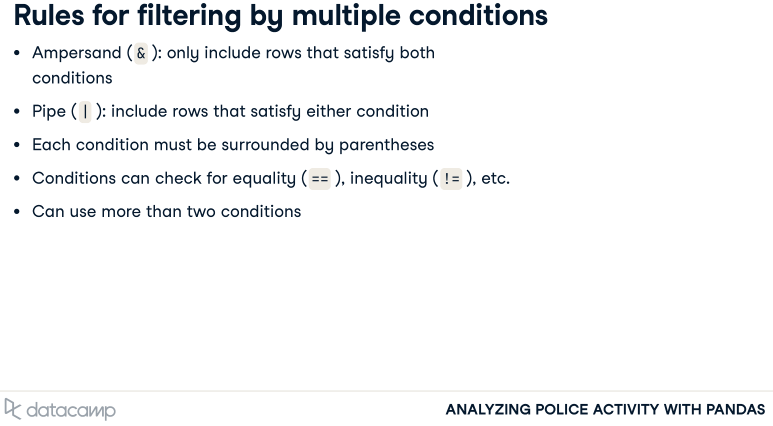

**Comparing speeding outcomes by gender**

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?




In [35]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') &
(ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') &
(ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


> The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

###Does gender affect whose vehicle is searched?

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does the driver's gender affect whether their vehicle is searched? 

**Math with Boolean values**

We can perform mathematical operations on Boolean values. For example, you previously used the ```isnull()``` method to generate a DataFrame of True and False values, and then took the ```sum()``` to count the missing values in each column. 



In [36]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

This worked because True values were treated as ones and False values were treated as zeros. 

Now we'll use the NumPy library to demonstrate a different operation, namely the mean. If we take the ```mean()``` of the list 0 1 0 0 we'll get 0.25, calculated as 1 divided by 4.


In [37]:
import numpy as np
np.mean([0, 1, 0, 0])

0.25

 Similarly, if you take the ```mean()``` of the list False True False False, you'll also get 0.25. 


In [38]:
np.mean([False, True, False, False])

0.25

 the mean of a Boolean Series represents the percentage of values that are True.

 **Taking the mean of a Boolean Series**

Let's see a real example of why it's useful to be able to take the mean of a Boolean Series. We'll first calculate the percentage of stops that result in an arrest using the ```value_counts()``` method. 

In [39]:
ri.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

 The arrest rate is around 3.6% since that's the percentage of True values. This would work on an object column or a Boolean column.

In [40]:
ri.is_arrested.dtype

dtype('bool')

 But we can get the same result more easily by taking the ```mean()``` of the is_arrested Series. 

In [41]:
ri.is_arrested.mean()

0.0355690117407784

 **Comparing groups using groupby**

 The second technique we'll review is ```groupby()```.

Let's pretend that we want to study the arrest rate by police district. We can see that there are six districts by using the Series method ```unique()```.

In [42]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

One approach we've used to compare groups is to filter the DataFrame by each group, and then perform a calculation on each subset. 

So to calculate the arrest rate in Zone K1, we would filter by that district, select the is_arrested column, and then take the ```mean()```. 

In [43]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

The arrest rate is about 2.4%, which is lower than the overall arrest rate of 3.6%.

In [44]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

The arrest rate in Zone K2, which is about 3.1%.

More efficient way to this - rather than calculate the mean of all six districts - is to perform the same calculation for all districts at once.

In [45]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

There is a noticeably higher arrest rate in Zone X4.

**Grouping by multiple categories**

We can group by district and gender by passing it as a list of strings.

In [46]:
ri.groupby(['district', 'driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

This computes the arrest rate for every combination of district and gender. In other words, we can see the arrest rate for males and females in each district separately. 

If we reverse the ordering of the items in the list, grouping first by gender and then by district, the calculations will be the same but the presentation of the results will be different. 

In [47]:
ri.groupby(['driver_gender', 'district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

**Calculating the search rate**

Checking the data type of search_conducted to confirm that it's a Boolean Series.

In [48]:
print(ri.search_conducted.dtype)

bool


Calculating the search rate by counting the Series values and expressing them as proportions.

In [49]:
print(ri.search_conducted.value_counts(normalize=True))

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


Calculating the search rate by taking the mean of the Series. (It should match the proportion of True values calculated above.)

In [50]:
print(ri.search_conducted.mean())

0.0382153092354627


> It looks like the search rate is about 3.8%. 

**Comparing search rates by gender**

Comparing the rates at which female and male drivers are searched during a traffic stop. 

Filtering the DataFrame to only include female drivers, and then calculating the search rate by taking the mean of search_conducted.

In [51]:
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


Filtering the DataFrame to only include male drivers, and then repeating the search rate calculation.

In [52]:
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


Grouping by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [53]:
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


> Male drivers are searched more than twice as often as female drivers. Why might this be?

**Adding a second factor to the analysis**

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation.

Let's find out, what's the case!

Using a ```.groupby()``` to calculate the search rate for each combination of gender and violation. *Are males and females searched at about the same rate for each violation?*

In [54]:
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


Reversing the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [55]:
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

###Does gender affect who is frisked during a search?

In this section, we'll take a look at what happens during a search.

**Examining the search types**

As we've seen previously, the search_conducted field is True if there's a search during a traffic stop, and False otherwise. 

In [56]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

There's also a related field, search_type, that contains additional information about the search.

In [57]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

> the search_type field has 83,229 missing values, which is identical to the number of False values in the search_conducted field.

That's because any time a search is not conducted, there's no information to record about a search, and thus the search_type will be missing.

The ```value_counts()``` method excludes missing values by default, and so we specified dropna equals False in order to see the missing values.

**Examining the search types**

There are only five possible values for search_type, which you can see at the top of the ```value_counts()``` output: Incident to Arrest, Probable Cause, Inventory, Reasonable Suspicion, and Protective Frisk.



In [58]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

But sometimes, multiple values are relevant for a single traffic stop, in which case they're separated by commas. Let's focus on Inventory, meaning searches in which the police took an inventory of the vehicle.

 Looking at the third line of the ```value_counts()``` output, we see 219, which is the number of searches in which Inventory was the only search type. 
 
But what if we wanted to know the total number of times in which an inventory was done during a search?

 We'd also have to include any stops in which Inventory was one of multiple search types. To do this, we'll use a string method.

**Searching for a string**

We'll use a string method called ```contains()``` that checks whether a string is present in each element of a given column. It returns True if the string is found, and False if it's not found. We also specify na equals False, which tells the ```contains()``` method to return False when it finds a missing value in the search_type column. We'll save the results in a new column called inventory.



In [59]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

In [60]:
ri.inventory.dtype

dtype('bool')

The data type of the column is Boolean. To be clear, a True value in this column means that an inventory was done during a search, and a False value means it was not. 

In [61]:
ri.inventory.sum()

441

Taking the ```sum()``` of the inventory column to see that an inventory was done during 441 searches. This includes the 219 stops in which Inventory was the only search type, plus additional stops in which Inventory was one of multiple search types.

**Calculating the inventory rate**

What if we wanted to calculate the percentage of searches which included an inventory?

Taking the ```mean()``` of the inventory column, and the answer would be about 0.5%. 

In [62]:
ri.inventory.mean()

0.0050961449570121106

*But what's wrong with this calculation?* 0.5% is the percentage of all traffic stops which resulted in an inventory, including those stops in which a search was not even done.

We first need to filter the DataFrame to only include those rows in which a search was done, and then take the mean() of the inventory column.

In [63]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

> The correct answer is that 13.3% of searches included an inventory. 


This is a vastly different result, and it highlights the importance of carefully choosing which rows are relevant before doing a calculation.


**Counting protective frisks**

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

We'll first check to see how many times "Protective Frisk" was the only search type. Then, we'll use a string method to locate all instances in which the driver was frisked.


In [64]:
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [65]:
# Checking if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)



In [66]:
# Checking the data type of 'frisk'
print(ri['frisk'].dtype)

# Taking the sum of 'frisk'
print(ri['frisk'].sum())

bool
303


>  It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

**Comparing frisk rates by gender**

We'll compare the rates at which female and male drivers are frisked during a search. *Are males frisked more often than females, perhaps because police officers consider them to be higher risk?*

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [67]:
# Creating a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculating the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculating the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


> The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

##Visual exploratory data analysis

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? 

In this chapter, we'll explore and analyze the dataset visually using plots.

###Analyzing datetime data

We converted the date_and_time column to pandas datetime format. Because of datetime format, we actually have access to special date-based attributes via the dt accessor.

For example, we can access the month as an integer by using the ```dt.month``` attribute. There are many other similar attributes available, such as week, dayofweek, hour, minute, and so on.

We can set the date_and_time column as the DataFrame index. Because of its data type, it is now a DatetimeIndex. We can still access the same datetime attributes, such as month, and we get the same result as before, but **we no longer have to use the dt accessor**.

**Calculating the hourly arrest rate**

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate.

> We'll find out whether the arrest rate varies by time of day.

First, we'll calculate the arrest rate across all stops in the ri DataFrame. Then, we'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

* 0 = midnight
* 12 = noon
* 23 = 11 PM

Taking the mean of the is_arrested column to calculate the overall arrest rate.



In [68]:
print(ri.is_arrested.mean())

0.0355690117407784


Grouping by the hour attribute of the DataFrame index to calculate the hourly arrest rate.

In [69]:
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Saving the hourly arrest rate Series as a new object, hourly_arrest_rate

In [70]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

**Plotting the hourly arrest rate**

We'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because we're showing how a quantity changes over time.

This plot should help us to spot some trends that may not have been obvious when examining the raw numbers!



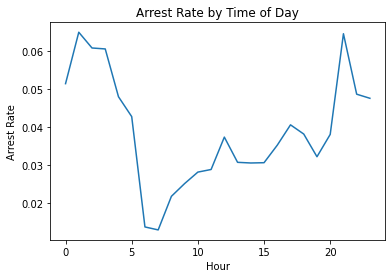

In [71]:
# Importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Creating a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Adding the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Displaying the plot
plt.show()

> The arrest rate has a significant spike overnight, and then dips in the early morning hours.

**Are drug-related stops on the rise?**

 In this section, we'll use subplots to help us examine the relationship between two variables over time.

 There's an alternative method to ```groupby()```, known as resampling, that we can use to accomplish the same task. 

 **resampling** is when we change the frequency of our time series observations.

 **resampling the drugs_related_stop**

we'll resample the price drugs_related_stop by month(on the 'A' frequency), and then chain the mean() method onto the end. 

The output is identical to the groupby() operation, except that the index consists of the last day of each year, rather than just the integers 1, 2, and 3.



 

In [72]:
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


**Resampling the volume**

The same technique we can use also to resample columns with other data types. 

For example: the apple DataFrame also has a volume column that displays the number of Apple shares traded that day. 

Let's resample that column, to calculate the mean daily volume for each month. One thing worth noticing is that the output has the same index as the last resampling operation, since both price and volume were resampled at the same frequency.

```
apple.volume.resample('M').mean()
```
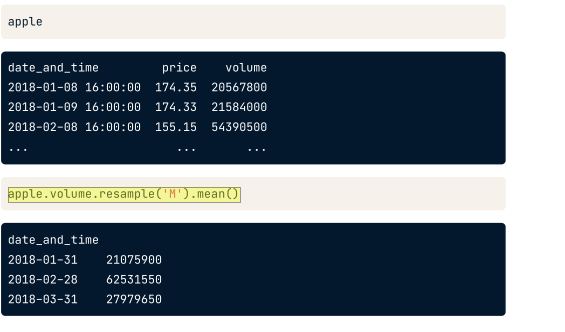


**Plotting drug-related stops**

Back to our Police Activity dataset. 

In a small portion of traffic stops, drugs are found in the vehicle during a search. We'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. We'll calculate the annual drug rate by resampling this column, and then we'll use a line plot to visualize how the rate has changed over time.



In [73]:
# Calculating the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Saving the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


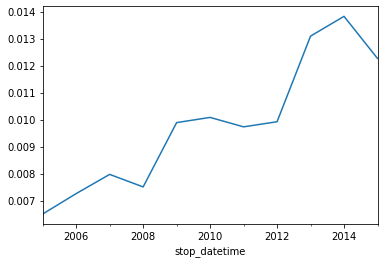

In [74]:
# Creating a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Displaying the plot
plt.show()

> The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

**Comparing drug and search rates**

As we saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

Let's first calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate.

In [75]:
annual_search_rate = ri.search_conducted.resample('A').mean()

Now that we've resampled both the drugs_related_stop and search_conducted data, we're going to combine the results into a single DataFrame so that we can study the relationship between drugs related stops and conducted searches.

We've already saved the two resampled Series as separate objects. Now we need to combine these two objects using the ```concat()``` function, which concatenates pandas objects along a specified axis.

 In this case, we want them to be combined along the columns axis, meaning that we want them side-by-side. 

In [76]:
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

print(annual)

               drugs_related_stop  search_conducted
stop_datetime                                      
2005-12-31               0.006501          0.049167
2006-12-31               0.007258          0.041758
2007-12-31               0.007970          0.044056
2008-12-31               0.007505          0.040310
2009-12-31               0.009889          0.049861
2010-12-31               0.010081          0.044805
2011-12-31               0.009731          0.035682
2012-12-31               0.009921          0.033616
2013-12-31               0.013094          0.030022
2014-12-31               0.013826          0.031801
2015-12-31               0.012266          0.028497


Notice that they aligned along their shared index. We'll save this new DataFrame as an object called annual.

**Plotting drugs_realated_stop and search-condcuted**

To visualize the relationship between price and volume, we simply call the ```plot()``` method on the annual DataFrame. pandas outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month.

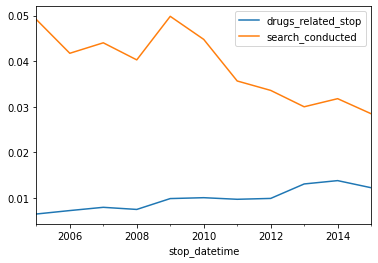

In [77]:
annual.plot()
plt.show()

But sharing the y-axis is problematic, because price and volume are on such different scales.

**Because of the different scales, we can't actually see the actual trend.**

 The solution to this problem is to set the subplots parameter to True, which results in two separate plots with independent y axes. 

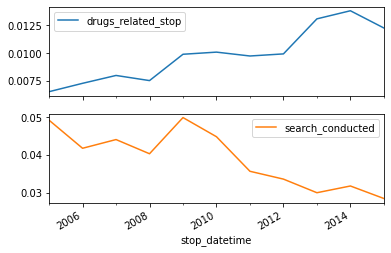

In [78]:
annual.plot(subplots=True)

plt.show()

> Now, we see that the rate of drug-related stops increased even though the search rate decreased, **disproving our hypothesis**.

**What violations are caught in each district?**

In the last section, we saw how easy it is to create line plots directly from a DataFrame. Now, we're going to make different types of plots from DataFrames.

**Computing a frequency table**

Let's discuss a function called ```crosstab()```, short for cross-tabulation. To use ```crosstab()```, we pass it two pandas Series that represent categories, and it outputs a frequency table in the form of a DataFrame.



In [79]:
pd.crosstab(ri.driver_race,
ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


We can think of a frequency table as a tally of how many times each combination of values occurs in the dataset. 

In this case, we passed driver_race and driver_gender to ```crosstab()```, and it tells us how many rows contain each combination of race and gender.

For example, 551 Asian female drivers were stopped, which we can verify by filtering the DataFrame and checking the shape. 

In [80]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 15)

Notice that race is along the index of the DataFrame and gender is along the columns, though you could transpose the DataFrame by reversing the order in which race and gender are passed to ```crosstab()```. 

Let's go ahead and save the frequency table as an object called table.

In [81]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)

**Selecting a DataFrame slice**

We'll use here ```loc``` accessor, which allows us to select portions of a DataFrame by label. Given our frequency table, let's pretend we want to select the Asian through Hispanic rows only. 

 Using ```loc```, we can extract this slice of the DataFrame by specifying the starting and ending labels, separated by a colon. Let's overwrite our existing table object with this smaller DataFrame.

In [82]:
table.loc['Asian':'Hispanic']

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


In [83]:
table = table.loc['Asian':'Hispanic']

**Creating a line plot**

If we plot the table object, we'll get a line plot by default, in which the index is along the x-axis and each column becomes a line. 

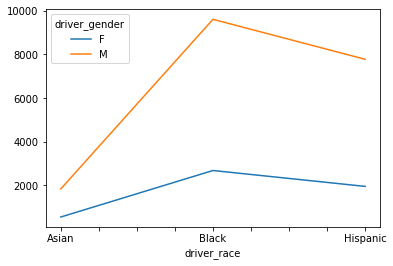

In [84]:
table.plot()
plt.show()

However, a line plot is not appropriate in this case because it implies a change in time along the x-axis, whereas the x-axis actually represents three distinct categories.

**Creating a bar plot**

By specifying kind equals bar, we can create a bar plot, which is much more appropriate than a line plot for comparing categorical data.

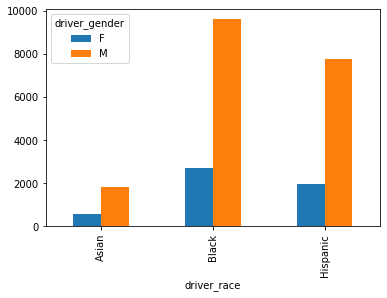

In [85]:
table.plot(kind='bar')
plt.show()

With this plot, the numbers in our frequency table have been converted to bars for which the height represents the magnitude.
* Each gender has been assigned a color, and the two gender bars for each race are placed next to one another. 

> The bar plot makes it especially easy to see the gender difference within each race. 

* For all three races, we see that the number of males stopped is far greater than the number of females stopped.

**Stacking the bars**

A variation of the bar plot is the stacked bar plot, which we can generate by adding the argument stacked equals True. 

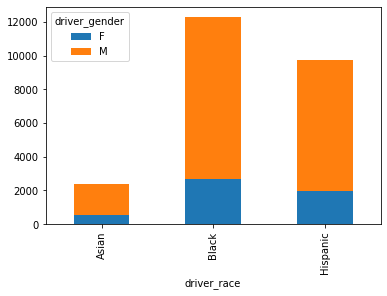

In [86]:
table.plot(kind='bar', stacked=True)
plt.show()

For each race, the two gender bars are now stacked on top of one another. 

* The strength of this plot is that it helps you to see the total stops for each race, which was not as obvious when the bars were side-by-side. 

* By emphasizing the totals, however, this plot slightly deemphasizes the individual components of each bar, and makes those components harder to compare against one another. 

> Neither type of bar plot is right or wrong, rather we should choose the plot that best helps to answer the question we're asking.

**Tallying violations by district**

The state of Rhode Island is broken into six police districts, also known as zones. *How do the zones compare in terms of what violations are caught by police?*

We'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the "K" zones, which we'll examine further in our analysis.


Creating a frequency table from the ri DataFrame's district and violation columns using the ```pd.crosstab()``` function.

In [87]:
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]


Saving the frequency table as 'all_zones'


In [88]:
all_zones = pd.crosstab(ri.district, ri.violation)

Selecting rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor and saving the smaller table as a new object, k_zones.

In [89]:
print(all_zones.loc['Zone K1': 'Zone K3'])

k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


> Next we'll plot the violations so that we can compare these districts.

**Plotting violations by district**

Now that we've created a frequency table focused on the "K" zones, we'll visualize the data to help us compare what violations are being caught in each zone.

First we'll create a bar plot, which is an appropriate plot type since we're comparing categorical data. Then we'll create a stacked bar plot in order to get a slightly different look at the data. *Which plot do will be more insightful?*



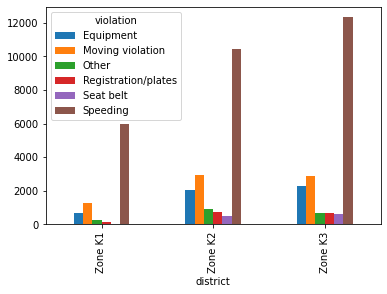

In [90]:
# Creating a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Displaying the plot
plt.show()

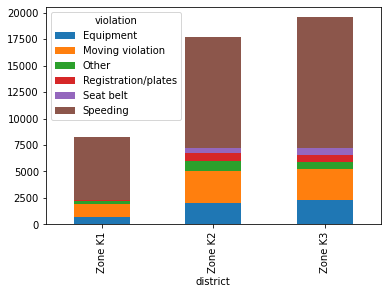

In [91]:
# Creating a bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Displaying the plot
plt.show()

> The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.


###How long might you be stopped for a violation?

In this section, we'll be translating strings into data that can be analyzed numerically, and then we'll review a few easy ways to improve the plots.

**Analyzing an object column**

First we'll take another example of how we can analyze a column, to take from it insightful observations. 

Let's consider a dataframe of Apple stock prices. 

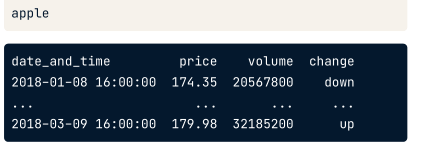

This dataframe, has a column 'change', which indicates whether the stock price went up or down compared to the previous trading day.

**How would we calculate how often the price of the stocks went up?**

 One way to do this would be to create a Boolean column that is True if the price went up, and False otherwise. Then we could easily calculate how often the price went up by taking the mean of the Boolean column.

  *But how would we create this column?*

  The change column has the object data type because it contains strings, and previously we've used the ```astype()``` method to convert strings to numbers or Booleans. However, ```astype()``` only works when pandas can infer how the conversion should be done, and that's not the case here. We'll need to find a different technique.

  **Mapping one set of values to another**

When we need to map one set of values to another, we can use the Series ```map()``` method. 

We provide it with a dictionary that maps the values we currently have to the values that we want. In this case, we want to map "up" to True and "down" to False, so we'll create a dictionary called mapping that specifies this.

```
mapping = {'up':True, 'down':False}
```

 Then, we'll use the ```map()``` method on the change column, pass it the mapping object, and store the result in a new column called is_up. 
 
 ```
 apple['is_up'] = apple.change.map(mapping)
 ```
 
 When we print the DataFrame, we'll see that the is_up column contains True when the change column says up, and False when the change column says down. 
 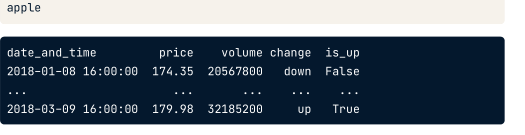
 
 Now that we have a Boolean column, we can calculate how often the price went up by taking the ```mean()``` of that column. 
 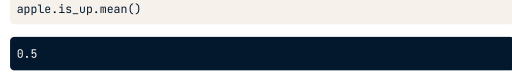
 
 The answer is that it went up 50% of the time.

**Calculating the search rate**

Let's get back to the Police Activity dataset now. 

*How about if we wanted to visualize how often searches were performed after each type of violation?*

We would group by violation, and then take the ```mean()``` of search_conducted.



In [92]:
ri.groupby('violation').search_conducted.mean()

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

This calculates the search_rate for each of the six violation types, and returns a Series that is sorted in alphabetical order by violation. 

We'll save this as an object named search_rate.

In [93]:
search_rate = ri.groupby('violation').search_conducted.mean()

**Creating a bar plot**

To visualize the search rate, we'll create a bar plot since we're comparing the search rate across categories. The violations are displayed on the x-axis, and the search rate is on the y-axis.

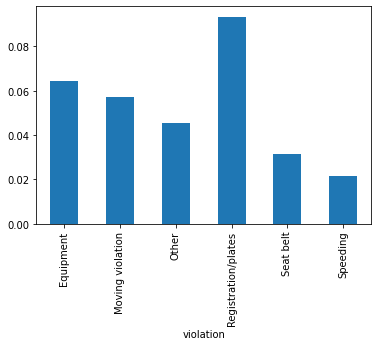

In [94]:
search_rate.plot(kind='bar')
plt.show()

 This plot looks okay, but there are two simple changes we can make that will make this plot more effective.

 **Ordering the bars**

 The first improvement we can make is to order the bars from left to right by size, which will make the plot easier to understand. All we need to do is to use the ```sort_values()``` method to sort the search_rate Series in ascending order.

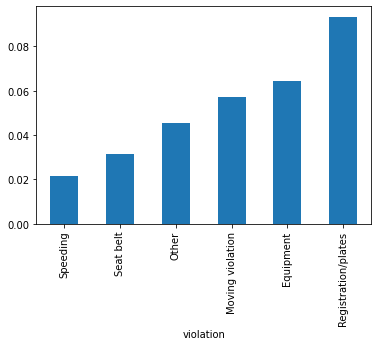

In [95]:
search_rate.sort_values()

search_rate.sort_values().plot(kind='bar')
plt.show()

This makes it easy to see which violations have the highest and the lowest search rates.

**Rotating the bars**

The second improvement we can make is to change the kind argument from bar to barh, which will rotate the bars so that they're horizontal. This makes it much easier to read the labels for each bar.



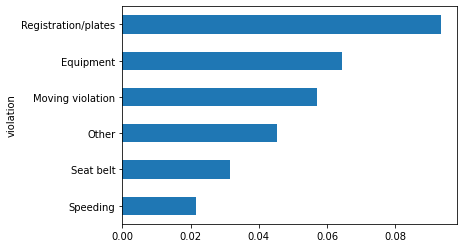

In [96]:
search_rate.sort_values().plot(kind='barh')
plt.show()

**Converting stop durations to numbers**

In the traffic stops dataset, the stop_duration column tells us approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. *How can we make this data easier to analyze?*

Let's convert the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:

* Converting '0-15 Min' to 8
* Converting '16-30 Min' to 23
* Converting '30+ Min' to 45

In [97]:
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


Creating a dictionary called mapping that maps the stop_duration strings to the integers specified above.

In [98]:
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

Converting the stop_duration strings to integers using the mapping, and storing the results in a new column called stop_minutes.

In [99]:
ri['stop_minutes'] = ri.stop_duration.map(mapping)

Printing the unique values in the stop_minutes column, to verify that the durations were properly converted to integers.

In [100]:
print(ri['stop_minutes'].unique())

[ 8 23 45]


> Next we'll analyze the stop length for each type of violation.

**Plotting stop length**

*If we were stopped for a particular violation, how long might we expect to be detained?*

Let's visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, we'll use violation_raw since it contains more detailed descriptions of the violations.


For each value in the ri DataFrame's violation_raw column, we'll calculate the mean number of stop_minutes that a driver is detained.

In [101]:
print(ri.groupby('violation_raw').stop_minutes.mean())

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


Saving the result

In [102]:
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

Sorting values and creating bar plot.

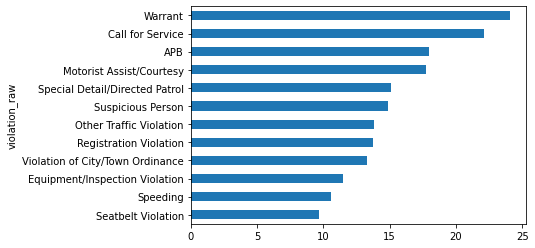

In [103]:
stop_length.sort_values()

stop_length.sort_values().plot(kind='barh')
plt.show()

##Analyzing the effect of weather on policing

use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. 

* merging and reshaping datasets, a
* assessing whether a data source is trustworthy, 
* working with categorical data, and other advanced skills.


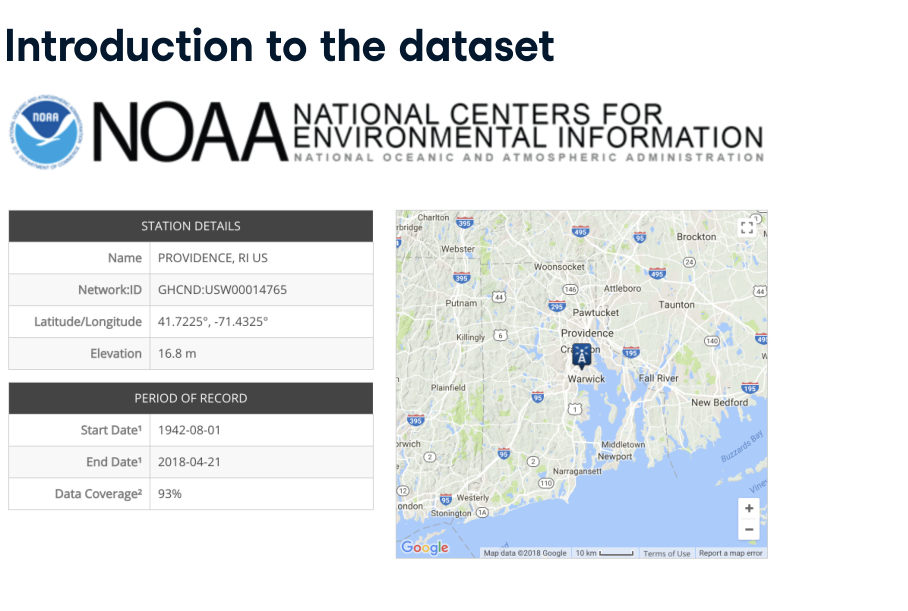

Loading in a new dataframe. . .

In [104]:
url2 = "https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv"
weather = pd.read_csv(url2)

Let's take a look, what we've got here...

In [105]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


Quite extensive dataset. 

More than 20 columns. 

Three of them ```TAVG``` , ```TMIN``` , ```TMAX``` are related to temperature. 

Two ```AWND``` , ```WSF2``` to wind speed. 

And all the ```WT..``` ones to the bad conditions of weather. 

---

*Before using a new dataset, it's a good practice to explore the data to check that the values seem reasonable. If you don't find anything unreasonable, then you gain increased confidence that the data is trustworthy.*

First we check the wind speed. 

```AWND``` is average wind speed in miles per hour, and ```WSF2``` is the fastest 2-minute wind speed, meaning the fastest wind speed during any 2-minute period.

We can use the ```describe()``` method on these two columns to see summary statistics including the minimum, maximum, and 25th through 75th percentiles.

In [106]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


> the minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. 

>  the numbers seem reasonable given that they are measured in miles per hour. 

**These are all simple signs that the data is trustworthy.**

Creating a box plot

We can examine those columns also by creating a box plot. 

This is essentially a visual representation of the summary statistics, in that the box represents the 25th through 75th percentiles, and the lines below and above the box represent the minimum and maximum values, excluding the outliers represented by circles. 




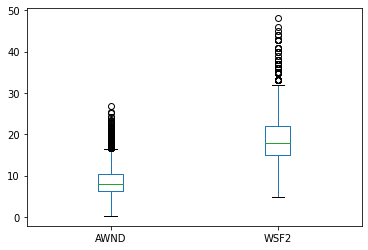

In [107]:
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

While examing the data using ```.describe()``` and box plots, our main goal is to check if the data looks reasonable. 

One other thing we can do, to check this, is by creating a histogram. It'll be useful to validate if: '*the fastest wind speed values are greater than the average values for every single row*'.  

To create such a histogram, we need to substract the average speed from the fastest speed and store the results in a new column. Like this:

In [108]:
weather['WDIFF'] = weather.WSF2 - weather.AWND

And then we can visualize the new column using a histogram, to see it's distribution. 

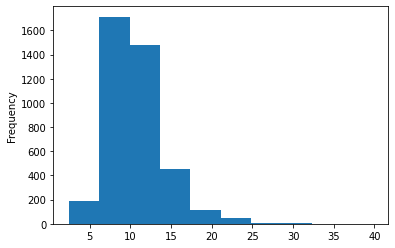

In [109]:
weather.WDIFF.plot(kind='hist')
plt.show()

> There are no values below zero, which is a good sign. But because there are some extreme values, it's hard to clearly see the shape of the distribution.

It'll be easier to use shape of the distrbution, when we'll change the number of bins in the histogram. 

Now, we have 10 bins, let's change it to 20. This way we'll have more narrow bins, which can help us to see the difference. 

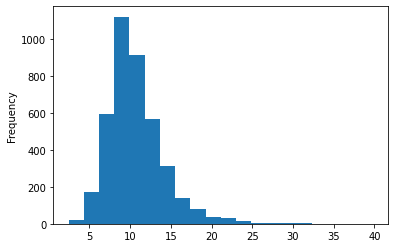

In [110]:
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

Changing the number of bins allowed us to see, that the distribution of the fastest and average wind speed values has generally a normal shape. 

> Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.

**Plotting the temperature**

Let's check out - in the same way - the other types of the data stored in this df. 

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


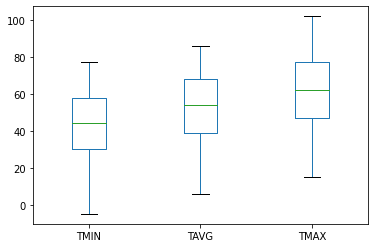

In [111]:

# Describing the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Creating a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Displaing the plot
plt.show()

**Plotting the temperature difference**



count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


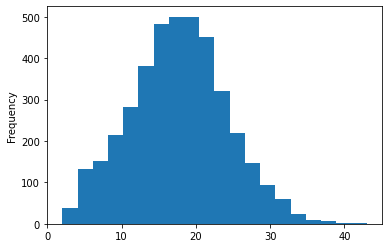

In [112]:
# Creating a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describing the 'TDIFF' column
print(weather['TDIFF'].describe())

# Creating a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins = 20)

# Displaying the plot
plt.show()

> The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

###Categorizing the weather

The ```weather``` DataFrame contains 20 columns that start with '```WT```', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, we'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

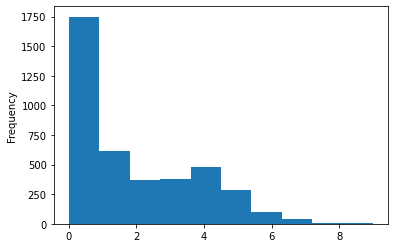

In [113]:
# Storing 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01': 'WT22']

# Calculating the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replacing missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Creating a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')
plt.show()

> It looks like many days had 0 bad weather condition, and some had even 4 or more. 

**Rating the weather conditions**

We've counted the number of bad weather conditions each day. Now we'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

* Convert 0 to 'good'
* Convert 1 through 4 to 'bad'
* Convert 5 through 9 to 'worse'

In [114]:
# Counting the unique values in 'bad_conditions' and sorting the index
print(weather.bad_conditions.value_counts().sort_index())

# Creating a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Converting the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Counting the unique values in 'rating'
print(weather['rating'].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


**Changing the data type to category**

Because rating has only 3 possible values, we'll change it's type to category. Also we'll sort those values in a logical order, to make it easier to interpret. 

In [115]:
# Creating a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Changing the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather['rating'], categories=cats, ordered=True)

# Examing the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


###Merging datasets

We've assigned a rating to the weather conditions each day. Now we'll merge the data with our Police Activity dataset, to see if the weather conditions have some impact on police behaviour. 

**Preparing the DataFrames**

Index is lost during the merge, so first thing we must is to move it to to the column. We're doing it with a function ```reset_index()```.


In [116]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8


In [117]:
ri.reset_index(inplace=True)
print(ri.head())

        stop_datetime   stop_date stop_time  ... inventory  frisk stop_minutes
0 2005-01-04 12:55:00  2005-01-04     12:55  ...     False  False            8
1 2005-01-23 23:15:00  2005-01-23     23:15  ...     False  False            8
2 2005-02-17 04:15:00  2005-02-17     04:15  ...     False  False            8
3 2005-02-20 17:15:00  2005-02-20     17:15  ...     False  False           23
4 2005-02-24 01:20:00  2005-02-24     01:20  ...     False  False            8

[5 rows x 17 columns]


**Preparing the second DataFrame**

We want to use only some columns from our weather df, so we need to prepare it accordingly. With our new weather df, there will be only columns 'rating' and 'date'. 

In [118]:
weather_rating = weather[['DATE','rating']]
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


**Merging the DataFrames**

Finally we'll be merging our two df's. Can't wait to see, what we'll find out!

We'll be doing it on the ```stop_date``` column from ```ri``` DF, and ```DATE``` column from ```weather_rating``` DF. The date format is a match here, so we don't need to modify it. 

First let's check the shape of our original DF, to make sure, that the changes that we'll implement in moment, will really take place. 

In [119]:
print(ri.shape)

(86536, 17)


Now, let's merge!

In [120]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
print(ri_weather.shape)

(86536, 19)


Great. We clearly see now, that the ```ri_weather``` df has 2 more columns. Let's  make the ```stop_datetime``` replace the current index. 

In [121]:
ri_weather.set_index('stop_datetime', inplace=True)
print(ri_weather.head())

                      stop_date stop_time  ...        DATE rating
stop_datetime                              ...                   
2005-01-04 12:55:00  2005-01-04     12:55  ...  2005-01-04    bad
2005-01-23 23:15:00  2005-01-23     23:15  ...  2005-01-23  worse
2005-02-17 04:15:00  2005-02-17     04:15  ...  2005-02-17   good
2005-02-20 17:15:00  2005-02-20     17:15  ...  2005-02-20    bad
2005-02-24 01:20:00  2005-02-24     01:20  ...  2005-02-24    bad

[5 rows x 18 columns]


###Does weather affect the arrest rate?

We have all our pieces in place, to check our final questions in this case study. 

**Driver gender and vehicle searches**

In our previous hypothesis, we're considering if there is a correlation between males and females and search rates, because different genders tends to commit different violations.  

Our hypothesis was proved not true - because the search rate is higher for males than for females across all violations. Which meant that there is no direct with vehicle searches and drived gender. 

**Examining a multi-indexed Series**

To compare the results, we'll create a pandas series with (like previously) mean of search_conducted column, grouped by violation and driver's gender. 



In [122]:
search_rate = ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

In [123]:
type(search_rate)


pandas.core.series.Series

```search_rate``` it's a pandas series, which means that it has multindex.  Violation and driver_gender are not columns, but the names of the index levels.

> With a DataFrame, which is normally two dimensions, the MultiIndex adds a third dimension. With a Series, which is normally one dimension, the MultiIndex adds a second dimension.



In [124]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

Working with a multi-indexed Series is actually very similar to working with a DataFrame. 

You can think of the outer index level, violation, as the DataFrame rows, and the inner index level, driver_gender, as the DataFrame columns. 

* For example, we can use the loc accessor to select the Equipment row. This returns the search rate by gender for equipment violations only. 
* Or, we can specify the Equipment row and the Male column to select a particular value in the Series.

**Converting a multi-indexed Series to a DataFrame**

If we are not comfortable using multi-indexed series, we can convert it to DF using ```unstack()```. 

```
search_rate.unstack()
```

There is another way to this, by using pivot table: 

```
ri.pivot_table(index='violation',
columns='driver_gender',
values='search_conducted')
```
Violation is the index, driver_gender is the columns, and the mean of search_conducted is the values.

**Comparing arrest rates by weather rating**

Do police officers arrest drivers more often when the weather is bad? Find out below!

* First, we'll calculate the overall arrest rate.
* Then, we'll calculate the arrest rate for each of the weather ratings you previously assigned.
* Finally, we'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.


Since we previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

In [125]:
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [126]:
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [127]:
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


> The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

**Selecting from a multi-indexed Series**

The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

* The outer index level is like the DataFrame rows.
* The inner index level is like the DataFrame columns.





In [129]:
#Saving the output of previous actions in different variable
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [130]:
#Printing arrest_rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [131]:
# Printing the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


**Reshaping the arrest rate data**

We'll start by reshaping the arrest_rate Series into a DataFrame.

It is a useful step because it alloww us to access the full range of DataFrame methods.

We'll do it in two different ways:
* with ```unstack()```
* and ```.pivottable()```



In [132]:
# Unstacking the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack)

<bound method Series.unstack of violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64>


In [133]:
# Creating the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
